In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_excel('practice_data.xlsx')
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


In [31]:
x = df[['Interpersonal Skills Rating']]
y = df[['Days Present']]

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

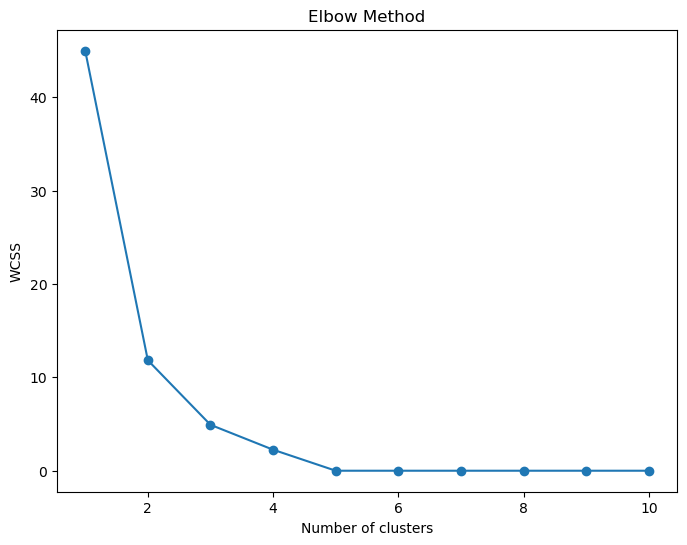

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss_values = kmeans.inertia_
    wcss.append(wcss_values )


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
df2 = pd.read_csv('sales.csv')

In [44]:
df2

,OrderID,OrderDate,Region,Salesperson,ProductName,Sales
0,1001,2023-01-01,East,Alice,Laptop,1200
1,1002,2023-01-16,West,Bob,Tablet,800
2,1003,2023-01-31,North,Charlie,Monitor,450
3,1004,2023-02-15,South,David,Printer,700
4,1005,2023-03-02,East,Eve,Laptop,1300
5,1006,2023-03-17,West,Frank,Monitor,470
6,1007,2023-04-01,North,Grace,Tablet,820
7,1008,2023-04-16,South,Heidi,Printer,750
8,1009,2023-05-01,East,Ivan,Laptop,1100
9,1010,2023-05-16,West,Judy,Monitor,490


Top Product

In [64]:
bar = df2['ProductName'].value_counts()

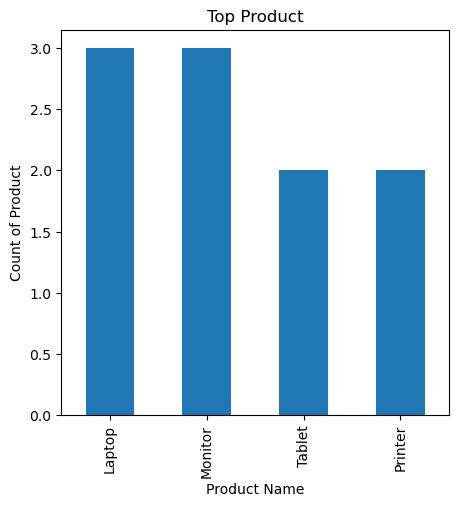

In [178]:
plt.figure(figsize=(5, 5))
bar.plot(kind='bar')
plt.title('Top Product')
plt.xlabel('Product Name')
plt.ylabel('Count of Product')
plt.show()


In [72]:
Monthly_trend = df2.groupby('ProductName')['OrderDate'].value_counts()
Monthly_trend

ProductName  OrderDate 
Laptop       2023-01-01    1
             2023-03-02    1
             2023-05-01    1
Monitor      2023-01-31    1
             2023-03-17    1
             2023-05-16    1
Printer      2023-02-15    1
             2023-04-16    1
Tablet       2023-01-16    1
             2023-04-01    1
Name: count, dtype: int64

Monthly Trend

In [160]:
df2['OrderDate'] = pd.to_datetime(df2['OrderDate'])
df2['Month'] = df2['OrderDate'].dt.to_period('M')
monthly_trend = df2.groupby('Month') ['Sales'].sum()

In [162]:
monthly_trend



Month
2023-01    2450
2023-02     700
2023-03    1770
2023-04    1570
2023-05    1590
Freq: M, Name: Sales, dtype: int64

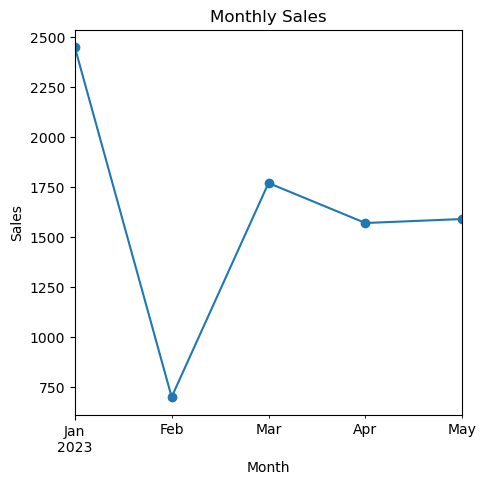

In [168]:
plt.figure(figsize=(5, 5))
monthly_trend.plot(kind='line', marker = 'o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [102]:
Regional_Sales = df2.groupby('Region')['Sales'].sum()

In [104]:
Regional_Sales

Region
East     3600
North    1270
South    1450
West     1760
Name: Sales, dtype: int64

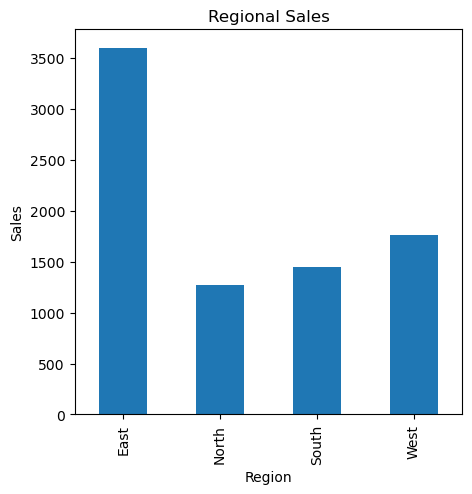

In [120]:
plt.figure(figsize=(5, 5))
Regional_Sales.plot(kind='bar')
plt.title('Regional Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()